# Assignment

In this assignment, we implement a simulation for estimating profit made at a sandwich shop. Not suprisingly, the sandwich shop earns money every time a customer buys a sandwich. However, the inputs to the sandwich cost money. The daily profit is the amount customers pay for the sandwiches minus the cost of the inputs. Unlike the simulations we saw in class, this time we need to set up simulations for multiple dependent events, so we worked out some of the solution and leave you to fill in the gaps as pointed out in the assignment.

## Problem statement

To keep things simple, we make the following assumptions:

- The shop bakes its own bread, and the bread must be used on the day it is made. The customers can select one of three types of bread, white, wheat, and multigrain.
- The number of each type of bread baked in the sandwich shop is fixed. Presumably the shop manager has a plan for the day, and the bread is baked in advance of the customer arrivals.
- The probability that each customer chooses a particular type of bread is fixed and known. There probabilities are 50% for white bread, 25% for wheat and 25% for multigrain. 
- If a customer's choice of bread is not available the customer leaves the shop without buying a sandwich.
- The only perishable input which must be discarded at the end of each day is the bread. 
- Customers do NOT stop coming to the sandwich shop as a result of not finding their bread choice. In other words, we will not consider the possiblity of attrition.

In order to develop an overall profitability model we must run through the following steps:

1. Simulate the number of customer arrivals on a given day.
1. Simulate supply and demand for each bread. Supply will be deterministic, but demand will depend on the number of customers who come on a given day and which type of bread they choose. 
1. Once we have supply and demand, we can finally simulate profit. 

Running the above simulation over many iterations will give us a distribution for daily profit. We can use this distribution to answer all sorts of questions about profitability. To help you better visualize the process, here's a flowchart that you can refer back to as you work on the assignment. 

![flow chart](../images/sandwich-shop.jpg)

## Setting up the simulation

We begin by writing a function called `daily_demand`, which will simulate how many of each bread customers will demand given the number of customers who walked in on a given day. To do so, we use the **multi-nomial distribution**, an extension of the binomial distribution that allows more than just two (binary) outcomes. We have 3 choices of bread in this case, each having a probability $p_i$ of occuring, where $p_i$ is fixed. How did we know to use the the multi-nomial distribution and not some other distribution? The answer to that is we made an educated guess based on (1) domain knowledge, and (2) knowledge of probability distributions. Of course we may be wrong about our choice, so when we're unsure it may be a good idea to also test other distributions, but we will stick with the multi-nomial distribution.

In [1]:
%%capture

import numpy as np
import pandas as pd
import itertools
import scipy
import scipy.stats
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as pxp

sns.set(rc = {'figure.figsize': (10, 8)})
sns.set_palette('muted')
sns.set_style('ticks')

AttributeError: _ARRAY_API not found

AttributeError: _ARRAY_API not found

AttributeError: _ARRAY_API not found

AttributeError: _ARRAY_API not found

In [2]:
bread_types = ['white', 'wheat', 'multigrain']
bread_probs = [.50, .25, .25]

def daily_demand(num_customers, bread_probs = bread_probs):
    return np.random.multinomial(n = num_customers, pvals = bread_probs)

daily_demand(num_customers = 100)

array([45, 28, 27])

Each time you rerun `daily_demand` you get a different distribution of bread types, but notice that the proportions of white, wheat and muligrain remain approximately 2, 1, 1, respectively.

- Write a function called `daily_supply` with two inputs: `num_breads` and `bread_probs`. The function should output the number of each type of bread that the shop will make on any given day. This is determined by just multiplying `num_breads` with `bread_probs`, so as long as `num_breads` is fixed, the function returns the same output. <span style="color:red" float:right>[2 point]</span>

In [3]:
def daily_supply(num_breads, bread_probs = bread_probs):
    return np.random.multinomial(n = num_breads, pvals = bread_probs)

daily_supply(num_breads=100)

array([63, 14, 23])

As stated in the assumptions, the number of breads we make will be fixed, but we let the number of customers arriving every day vary by simulating it using a **Poisson distribution**. Often arrival rates, $k$, per time interval are modeled as a Poisson process with rate or intensity $\lambda$, which can be written:

$$P(k \text{ arrivals } | \lambda \text{ average arrival rate}) = \frac{\lambda^k\ e^{-\lambda}}{k!}$$

Note that if the arrival rate is fairly high, the difference between a Poisson distribution and an appropriate normal distribution will be minimal. So we could also use a normal distribution and apply the continuity correction, as shown in the lecture. But we will stick with the Poisson distribution.

- Write a function called `sim_demand` with two inputs: `arrival_rate` and `num_days`. The function should return a `DataFrame` with `num_days` rows and three columns: `white`, `wheat` and `multigrain`. For each row, we first simulate the number of arrivals using a Poisson distribution with mean equal to `arrival_rate` and then use the `daily_demand` function to simulate daily demand for each type of bread which populate the columns. Refer to the flow chart to see a sample of the output. <span style="color:red" float:right>[5 point]</span>

In [4]:
def sim_demand(arrival_rate, num_days):
    arrivals = np.random.poisson(lam = arrival_rate, size = num_days) # compute realizations of arrivals
    demand = pd.DataFrame(columns = bread_types)

    for i, a in enumerate(arrivals):
        demand.loc[i, :] = daily_demand(num_customers = a)
    
    return demand

sim_demand(arrival_rate = 100, num_days = 10) # run this to test your function

,white,wheat,multigrain
0,50,19,27
1,51,17,20
2,48,21,26
3,50,33,27
4,56,20,21
5,59,28,26
6,52,25,26
7,58,24,25
8,52,23,17
9,49,21,27


- Write a function called `sim_supply` with two inputs: `num_breads`, and `num_days`. Just like the previous function, this function should also return a `DataFrame` with `num_days` rows and three columns: `white`, `wheat` and `multigrain`. For each row, we pass `num_breads` to `daily_supply` to get the number of each bread type we make, which we use to populate the columns. Since we are fixing `num_breads = 100`, we should see the same set of values at each row. Refer to the flow chart to see a sample of the output. <span style="color:red" float:right>[5 point]</span>

In [5]:
def sim_supply(num_breads, num_days):
    estimate = np.random.poisson(lam=num_breads,size=num_days)
    prepped = pd.DataFrame(columns=bread_types)
    
    for i,b in enumerate(estimate):
        prepped.loc[i,:] = daily_supply(num_breads=b)
    
    return prepped

sim_supply(num_breads = 100, num_days = 10) # run this to test your function

,white,wheat,multigrain
0,51,18,27
1,57,20,27
2,63,28,24
3,55,24,24
4,56,33,28
5,34,24,23
6,49,25,19
7,51,30,33
8,67,18,31
9,45,25,23


You now have almost all the pieces in place to create the complete simulation of the distribution of profitability of the sandwich shop. The only missing piece is to compute the total profit based on the number of sandwiches sold and the cost of the bread baked.

We can now calculate how much profit each bread type is generating over a certain number of days. To do so, we first simulate supply and demand for each of those days, we then calculate the revenue from all the bread we sold that day and subtract the cost of making bread that day. Keep in mind that not all the bread we made is sold, so left-overs contribute to the cost, but not to the revenue!

- Complete the `sim_profit` function by calculating profit by type of bread. The function returns **three** `DataFrame` objects, containing the supply, demand, and profit for each bread type each day. Refer to the above flowchart if needed. <span style="color:red" float:right>[15 point]</span>

In [6]:
def sim_profit(num_breads, num_days, arrival_rate, sell_price, cost_price):

    # simulate supply of sandwiches
    supply = sim_supply(num_breads,num_days)
    # simulate demand for sandwiches
    demand = sim_demand(arrival_rate,num_days)
    
    # calculate left-over supply
    leftovers = supply - demand    
    # calculate profit (you may need many lines of code here)
    sales = supply.where(leftovers < 0, demand)
    profit = (sales * sell_price) - (supply * cost_price)

    return supply, demand, profit

sim_profit(num_breads = 100, num_days = 3, arrival_rate = 100, sell_price = 4.00, cost_price = 1.25) # run this to test your function

(  white wheat multigrain
 0    47    19         34
 1    60    15         27
 2    58    37         22,
   white wheat multigrain
 0    52    23         28
 1    47    18         35
 2    56    21         23,
     white  wheat multigrain
 0  129.25  52.25       69.5
 1   113.0  41.25      74.25
 2   151.5  37.75       60.5)

The hard part is over! If all worked well we can now increase `num_days` to a much higher value so we can simulate a lot of data.

In [7]:
supplies, demands, profits = sim_profit(num_breads = 100, num_days = 1000, arrival_rate = 100, sell_price = 4.00, cost_price = 1.25)

- Plot the distributions of total demand and total profit ("total" here means summing accross bread types). Based on the distributions describe what a "good day" and a "bad day" at the sandwich shop looks like in terms of demand and profit.  <span style="color:red" float:right>[10 point]</span>

In [8]:
profit_demand = pd.DataFrame()
profit_demand['demand'] = demands.sum(axis=1)
profit_demand['supply'] = supplies.sum(axis=1)
profit_demand['profit'] = profits.sum(axis=1)
profit_demand.index.name = 'day'

profit_demand.head()

,demand,supply,profit
day,,,
0,92,99,224.25
1,89,100,175.0
2,109,126,278.5
3,112,105,232.75
4,88,95,141.25


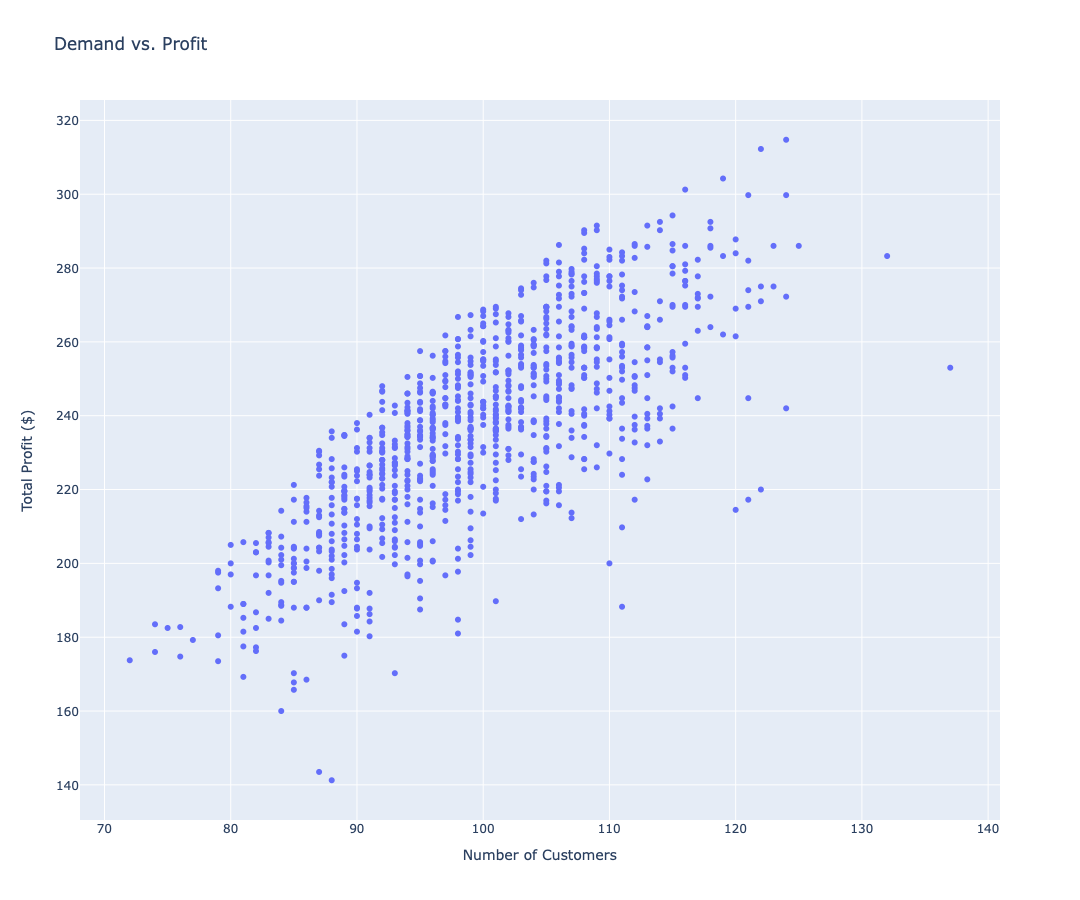

In [12]:
pxp.scatter(
    profit_demand,
    x='demand',
    y='profit',
    height=900,
    title="Demand vs. Profit",
    labels={'demand':'Number of Customers','profit':'Total Profit ($)'},
    )

> Based on a few iterations of the simulation and the above plot, I believe a "good day" at the sandwich shop is any day with over 90 customers visiting the shop and a "bad day" is one with under 85 customers.
>
> There is some grey area there as some iterations show profits increasing over $200 with less distribution then others, but consistently the grouping over 90 and less than 120 shows that is likely where the shop is running at its peak when making 100 loaves of bread per day.

So far we assumed that the supply of bread each day is fixed, but we can now loosen that assumption and ask what happens to profit if we increase or decrease the supply of bread, everything else being equal.

- Run `sim_profit` for the different values of `num_breads` as given by `num_breads_iter` shown below (all other arguments stay the same). Calculate the average profit (averaged over all the days) for each case and create a line plot showing number of breads supplied vs total profit. <span style="color:red" float:right>[5 point]</span>

In [10]:
num_breads_iter = [60, 80, 100, 120, 140, 160]
num_days = 1000
arrival_rate = 100
sell_price = 4.00
cost_price = 1.25

bread_varies = pd.DataFrame(columns=['num_breads','profit'])
for n,count in enumerate(num_breads_iter):
    wk_supply,wk_demand,wk_profit = sim_profit(count,num_days,arrival_rate,sell_price,cost_price)
    this_profit = wk_profit.sum(axis=1).mean(axis=0)
    bread_varies.loc[n,:] = (count,this_profit)

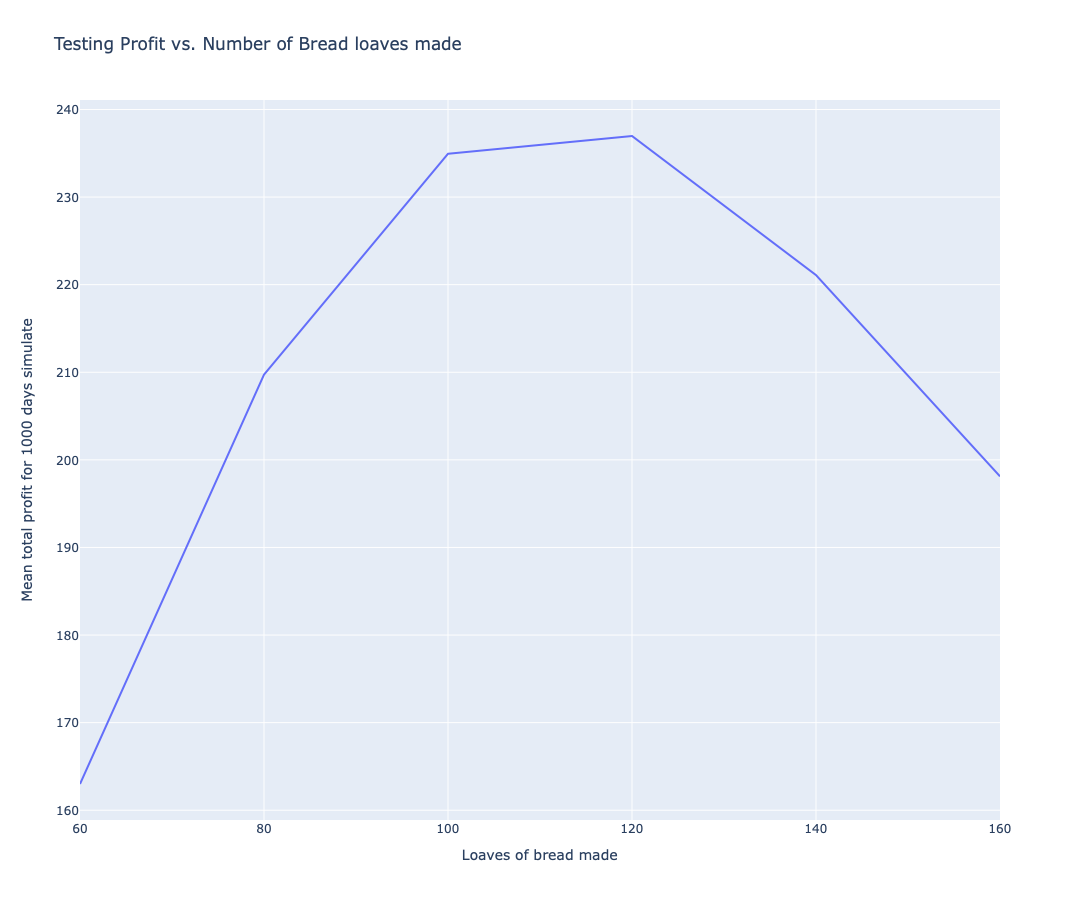

In [13]:
pxp.line(
    bread_varies,
    x='num_breads',
    y='profit',
    height=900,
    title="Testing Profit vs. Number of Bread loaves made",
    labels={'num_breads':"Loaves of bread made",'profit':f"Mean total profit for {num_days} days simulate"}
    )

As you can see, once we can simulate daily profit, we can begin to answer many questions and reduce our uncertainty about the business. For this reason, Monte Carlo simulations can be an effective tool for measuring risk and reward.


# End of assignment